## Import Packages and Load Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
# Load Dataset

df = pd.read_csv('gs://sean_sullivan_projects/MLB_EVOE_Project/January_2022_Data/data_for_clusters.csv')

df.shape

(526, 28)

In [24]:
# columns

df.columns

Index(['fangraphs_id', 'name_last', 'name_first', 'team', 'g', 'ab', 'pa', 'h',
       '_1B', '_2B', '_3B', 'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'AVG',
       'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 'wOBA', 'wRAA', 'wRC',
       'Average_EVOE'],
      dtype='object')

In [25]:
# Filter for > 100 PAs

df = df[df['ab'] >= 100]

df.shape

(450, 28)

In [15]:
# Let's remove identifiers

df_cluster = df[['g', 'ab', 'pa', 'h','_1B', '_2B', '_3B', 'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'BABIP', 
                 'wOBA', 'wRAA', 'wRC', 'Average_EVOE']]


df_ids = df[['fangraphs_id', 'name_last', 'name_first', 'team']]    

<br>

### Now that data is ready, we need to normalize the data that will be clustered.

In [16]:
# NORMALIZE Data

min_max_scaler = MinMaxScaler().fit(df_cluster)

dfNorm= min_max_scaler.transform(df_cluster)

<br>

## Determine optimal number of clusters

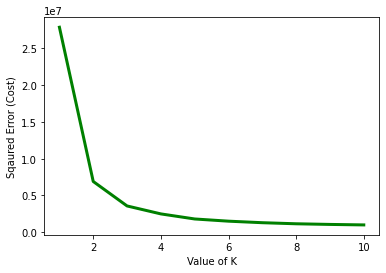

In [17]:
#Function
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(df[clusters == c])
    return size



cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(df_cluster) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

**Interpretation:**

Using the "elbow method", I look for where the cost begins to quickly decline. This tends to look like an elbow, hence the "elbow method". In this case, this appears to happen at k=3. So, I will use 3 clusters for this analysis.

<br>

## Cluster Sizes and Visualization

In [18]:
# Using 3 clusters

kmeans = KMeans(n_clusters=3, max_iter=500)
kmeans.fit(dfNorm)
clusters = kmeans.predict(dfNorm)

size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  143
Size of Cluster 1 =  177
Size of Cluster 2 =  130


Text(0, 0.5, 'At Bat Count')

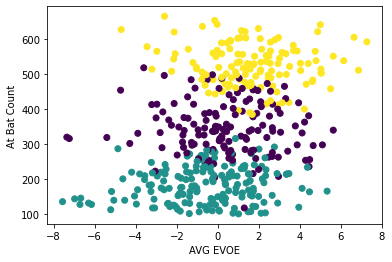

In [20]:
# Visualize Clusters with Average EVOE x At Bats

plt.scatter(df_cluster['Average_EVOE'], df_cluster['ab'], c=clusters)
plt.xlabel("AVG EVOE") 
plt.ylabel("At Bat Count")

Text(0, 0.5, 'Weight Runs Created')

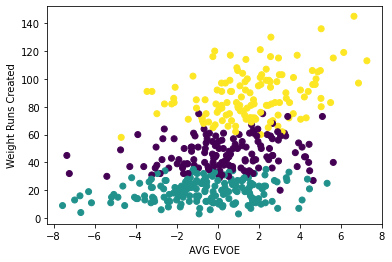

In [21]:
# Visualize Clusters with Average EVOE x wRC

plt.scatter(df_cluster['Average_EVOE'], df_cluster['wRC'], c=clusters)
plt.xlabel("AVG EVOE") 
plt.ylabel("Weight Runs Created")

**Interpretation:**

Visualizing the clusters with Average EVOE x At Bats shows distinct groupings. There is some overlap, which isn't surprised since we are only cutting the clusters by two variables. It would be interesting seeing who is in the middle cluster (purple) with the least about of at bats since they are the only member of their cluster that seems out of place. 

Looking at Average EVOE x wRC shows less overlap. There are some members of middle cluster that are leaking into the highest cluster (yellow) - so those would be interesting to explore as well. 

<br>

## Add cluster assignment to DF and determine which cluster is which

In [27]:
df['cluster'] = clusters

In [28]:
df.head()

,fangraphs_id,name_last,name_first,team,g,ab,pa,h,_1B,_2B,_3B,HR,R,RBI,BB,IBB,SO,HBP,AVG,OBP,SLG,OPS,ISO,BABIP,wOBA,wRAA,wRC,Average_EVOE,cluster
0,17350,devers,rafael,BOS,156,591,664,165,89,37,1,38,101,113,62,7,143,7,0.279,0.352,0.538,0.890,0.259,0.307,0.373,32.2,113,7.27,2
1,4949,stanton,giancarlo,NYY,139,510,579,139,85,19,0,35,64,97,63,1,157,3,0.273,0.354,0.516,0.870,0.243,0.324,0.370,26.4,97,6.86,2
2,19611,guerrero,vladimir,TOR,161,604,698,188,110,29,1,48,123,111,86,7,110,6,0.311,0.401,0.601,1.002,0.290,0.313,0.419,60.4,145,6.64,2
3,19755,ohtani,shohei,LAA,158,537,639,138,58,26,8,46,103,100,96,20,189,4,0.257,0.372,0.592,0.965,0.335,0.303,0.393,41.8,119,6.14,2
4,15640,judge,aaron,NYY,148,550,633,158,95,24,0,39,89,98,75,2,158,3,0.287,0.373,0.544,0.916,0.256,0.332,0.387,38.0,115,5.63,2


In [40]:
# Print Statements

print('Cluster 0 mean EVOE: ', round(df[df['cluster'] == 0].Average_EVOE.mean(),2))
print('Cluster 1 mean EVOE: ', round(df[df['cluster'] == 1].Average_EVOE.mean(),2))
print('Cluster 2 mean EVOE: ', round(df[df['cluster'] == 2].Average_EVOE.mean(),2))
print()
print('Cluster 0 mean At Bats: ', round(df[df['cluster'] == 0].ab.mean(),2))
print('Cluster 1 mean At Bats: ', round(df[df['cluster'] == 1].ab.mean(),2))
print('Cluster 2 mean At Bats: ', round(df[df['cluster'] == 2].ab.mean(),2))
print()
print('Cluster 0 mean wRC: ', round(df[df['cluster'] == 0].wRC.mean(),2))
print('Cluster 1 mean wRC: ', round(df[df['cluster'] == 1].wRC.mean(),2))
print('Cluster 2 mean wRC: ', round(df[df['cluster'] == 2].wRC.mean(),2))

Cluster 0 mean EVOE:  0.4
Cluster 1 mean EVOE:  -0.58
Cluster 2 mean EVOE:  1.64

Cluster 0 mean At Bats:  344.48
Cluster 1 mean At Bats:  182.8
Cluster 2 mean At Bats:  524.62

Cluster 0 mean wRC:  46.37
Cluster 1 mean wRC:  19.48
Cluster 2 mean wRC:  87.58


<br>

**Interpretation:**

From evaluating each cluster's mean values for Average EVOE, At Bats, and wRC, we can determine which colors belong to each cluster. 

Cluster 2 can be deemed "The High Performers". They get the most opportunities to hit (at bats), have the best average wRC, and have the highest Average EVOE. 

Cluster 0 is "The Middle Ground". They get the second most amount of opportunities to hit, have the second best average wRC, and have the second highest Average EVOE. 

Cluster 1 is "The Bottom of the Barrel". Simply put, they have the lowest values for each of these metrics. 

<br>

In [41]:
# Push File to GCS

df.to_csv('gs://sean_sullivan_projects/MLB_EVOE_Project/January_2022_Data/results_2021_clusters.csv')